# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import csv
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import random
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'



In [4]:
#url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city=city.replace(' ', '%20')
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#create an empty list to store data (columns)
names = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record=0

In [7]:
#Perform a weather check on each city using a series of succesive API calls
#start with weathermap API call

print(f"Begining Data Retrieval")
print(f"------------------------------")

#loop through the city from the cities list
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&units={units}&q={city}"
        response = req.get(query_url).json()
        names.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city}")
        print(f"{url}appid={api_key}&units={units}&q={city}")
        time.sleep(random.choice([0,.2,.3,.5,1,1.5,2]))
        #Increase counter by 1
        record = record + 1
    
    #if not record is found skip to next call
    except:
        if city not in cities:
            print("City not found. Skipping...")
            continue

Begining Data Retrieval
------------------------------
Processing Record 0 | shiyan
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=shiyan
Processing Record 1 | ponta%20do%20sol
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=ponta%20do%20sol
Processing Record 2 | tigil
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=tigil
Processing Record 3 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=kapaa
Processing Record 4 | punta%20arenas
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=punta%20arenas
Processing Record 5 | east%20london
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=east%20london
Processing Record 6 | rikitea
http://api.openweathermap.org/data/

Processing Record 55 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=talnakh
Processing Record 56 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=sitka
Processing Record 57 | hobyo
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=hobyo
Processing Record 58 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=chuy
Processing Record 59 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=souillac
Processing Record 60 | tateyama
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=tateyama
Processing Record 61 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=hilo
Processing Record 62 |

Processing Record 112 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=dikson
Processing Record 113 | yuzhou
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=yuzhou
Processing Record 114 | anadyr
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=anadyr
Processing Record 115 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=camacha
Processing Record 116 | sabha
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=sabha
Processing Record 117 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=coihaique
Processing Record 118 | chaihe
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=chaihe
Process

Processing Record 169 | burgthann
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=burgthann
Processing Record 170 | tezu
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=tezu
Processing Record 171 | coari
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=coari
Processing Record 172 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=saint-augustin
Processing Record 173 | morgan%20hill
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=morgan%20hill
Processing Record 174 | pakxan
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=pakxan
Processing Record 175 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=i

Processing Record 226 | praia%20da%20vitoria
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=praia%20da%20vitoria
Processing Record 227 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=tuktoyaktuk
Processing Record 228 | oskemen
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=oskemen
Processing Record 229 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=namatanai
Processing Record 230 | bhaktapur
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=bhaktapur
Processing Record 231 | sistranda
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=sistranda
Processing Record 232 | surin
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c

Processing Record 282 | dunedin
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=dunedin
Processing Record 283 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=sabang
Processing Record 284 | parsons
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=parsons
Processing Record 285 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=kavaratti
Processing Record 286 | naze
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=naze
Processing Record 287 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=coahuayana
Processing Record 288 | mombetsu
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=momb

Processing Record 339 | inirida
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=inirida
Processing Record 340 | guozhen
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=guozhen
Processing Record 341 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=petropavlovsk-kamchatskiy
Processing Record 342 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=namibe
Processing Record 343 | namtsy
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=namtsy
Processing Record 344 | piacabucu
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=piacabucu
Processing Record 345 | lebanon
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f

Processing Record 396 | copiapo
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=copiapo
Processing Record 397 | sao%20jose%20da%20coroa%20grande
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=sao%20jose%20da%20coroa%20grande
Processing Record 398 | rundu
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=rundu
Processing Record 399 | san%20jose
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=san%20jose
Processing Record 400 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=ostrovnoy
Processing Record 401 | terrak
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=terrak
Processing Record 402 | pacasmayo
http://api.openweathermap.org/data/2.5/weather?appid=2

Processing Record 453 | linkuva
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=linkuva
Processing Record 454 | half%20moon%20bay
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=half%20moon%20bay
Processing Record 455 | itacarambi
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=itacarambi
Processing Record 456 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=mehamn
Processing Record 457 | tornio
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=tornio
Processing Record 458 | port%20hedland
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=port%20hedland
Processing Record 459 | acapulco
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8

Processing Record 510 | fuente%20de%20oro
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=fuente%20de%20oro
Processing Record 511 | pacific%20grove
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=pacific%20grove
Processing Record 512 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=arlit
Processing Record 513 | ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?appid=2e33408dfc89c43fb9d8f7b7334cd3af&units=imperial&q=ornskoldsvik


In [8]:
weather_data=pd.DataFrame({
    'City Name':names,
    'Cloudiness':clouds,
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Max Temperature':max_temp,
    'Latitude':lat,
    'Longitude':lng,
    'Wind Speed':wind_speed
})

In [9]:
weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Max Temperature,Latitude,Longitude,Wind Speed
0,Shiyan,100,CN,1556993169,78,60.22,32.65,110.78,2.51
1,Ponta do Sol,100,BR,1556993171,71,77.50,-20.63,-46.00,3.76
2,Tigil,34,RU,1556993171,64,32.68,57.80,158.67,7.85
3,Kapaa,90,US,1556992997,100,69.80,22.08,-159.32,16.11
4,Punta Arenas,40,CL,1556992993,80,41.00,-53.16,-70.91,6.93


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
export_csv = weather_data.to_csv (r'.\export_dataframe.csv', index = None, header=True)

In [17]:
load_data=pd.read_csv('./export_dataframe.csv')

In [18]:
weather_data=pd.DataFrame(load_data)
weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Max Temperature,Latitude,Longitude,Wind Speed
0,Shiyan,100,CN,1556993169,78,60.22,32.65,110.78,2.51
1,Ponta do Sol,100,BR,1556993171,71,77.50,-20.63,-46.00,3.76
2,Tigil,34,RU,1556993171,64,32.68,57.80,158.67,7.85
3,Kapaa,90,US,1556992997,100,69.80,22.08,-159.32,16.11
4,Punta Arenas,40,CL,1556992993,80,41.00,-53.16,-70.91,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

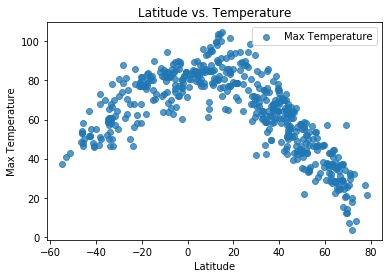

In [19]:
plt.scatter(weather_data['Latitude'],weather_data['Max Temperature'], alpha=.75)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Temperature')
plt.savefig('lat_vs_temp.png')


#### Latitude vs. Humidity Plot

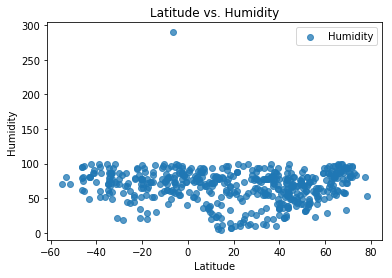

In [20]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'], alpha=.75)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

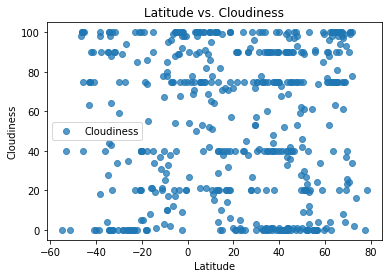

In [21]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'], alpha=.75)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

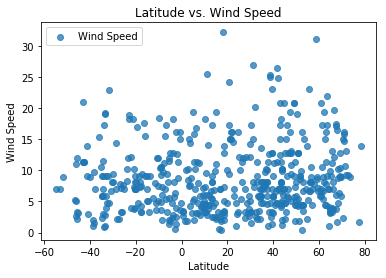

In [22]:
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'], alpha=.75)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.savefig('lat_vs_wind_speed.png')

The closer a city is to the equator the warmer the weather is in that area.

There is no discernable relatioship between latitude and humidity.

There is no discernable relatioship between latitude and cloudiness.

There is no discernable relatioship between latitude and wind speed.